In [10]:
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
G = nx.DiGraph()
G.add_edges_from([
        ("H1", "H2"),
        ("H2", "H3"),
        ("H3", "H4"),
        ("H4", "H5"),
        ("H1", "O1"),
        ("H2", "O2"),
        ("H3", "O3"),
        ("H4", "O4"),
        ("H5", "O5"),])

x, y, z = ({"H1", "O1"}, {"H5", "O5"}, {"H3"})

In [12]:
# new version not in pip
# nx.minimal_d_separator(instrumental_dag, {"Z", "X"}, {"X", "Y"}, {"X"}) # not working, from old version
"""
nx.d_separated(G, x, y, z) # working, from old version

nx.is_d_separator(G, x, y, z) # not working, from new version
nx.is_minimala_d_separator(G, x, y, z) # not working, from new version?
nx.is_minimal_d_separator(G, x, y, z | {"O3"})
z = nx.find_minimal_d_separator(G, x | y, {"O2", "O3", "O4"})
z == {"H2", "H4"}
"""

'\nnx.d_separated(G, x, y, z) # working, from old version\n\nnx.is_d_separator(G, x, y, z) # not working, from new version\nnx.is_minimala_d_separator(G, x, y, z) # not working, from new version?\nnx.is_minimal_d_separator(G, x, y, z | {"O3"})\nz = nx.find_minimal_d_separator(G, x | y, {"O2", "O3", "O4"})\nz == {"H2", "H4"}\n'

In [13]:
x1 = {"x1", "y1", "z1"}
x2 = {"x2", "y2", "z2", "q1"}
x3 = x1 |x2

x3
#print(x3)

{'q1', 'x1', 'x2', 'y1', 'y2', 'z1', 'z2'}

In [14]:
# create DAGs

dag0 = nx.DiGraph()
dag0.add_edges_from([
        ("A", "B"),
        ("A", "C"),
        ("B", "D"),
        ("C", "D"),
        ("C", "E"),])

instrumental_dag = nx.DiGraph()
instrumental_dag.add_edges_from([
        ("Z", "X"),
        ("X", "Y"),
        ("H", "X"),
        ("H", "Y"),])

In [15]:
bell_dag = nx.DiGraph()
bell_dag.add_edges_from([
        ("l", "A"),
        ("l", "B"),
        ("X", "A"),
        ("Y", "B"),])


dag2 = nx.DiGraph()
# dag2.add_edges_from([
#         ("A", "B", "C"),
#         ("D", "E", "F"),
#         ("G", "H", "I"),])
dag2.add_edges_from([
        ("A", "B"),
        ("B", "C"),

        ("D", "E"),
        ("E", "F"),

        ("G", "H"),
        ("H", "I"),])


ex_dag = nx.DiGraph()
ex_dag.add_edges_from([
        ("X2", "X3"),
        ("X1", "X3"),
        ("X1", "X4"),
        ("X4", "X5"),
        ("X3", "X5"),])

In [16]:
#nx.is_d_separator(instrumental_dag, {"Z", "X"}, {"X", "Y"}, {"X"})
nx.d_separated(instrumental_dag, {"Z", "X"}, {"X", "Y"}, {"X"})

False

In [17]:
def plt_dag(dag):
        plt.figure(figsize=(8, 5))
        nx.draw(dag, with_labels=True, 
                node_size=2000, node_color="white", edgecolors="black", 
                font_size=20, font_weight='bold', 
                arrowstyle='->', arrowsize=20)
        plt.title("DAG Example")
        plt.show()

def plot_dag(dag, hidden):
    # node positions
    pos = nx.spring_layout(dag)

    plt.figure(figsize=(8, 5))
    
    # hidden nodes
    if hidden:
        nx.draw_networkx_nodes(dag, pos, nodelist=hidden, node_size=2000, node_color="white", edgecolors="black", 
                               node_shape='^')
    
    # observable nodes
    circle_nodes = [node for node in dag.nodes if node not in hidden]
    nx.draw_networkx_nodes(dag, pos, nodelist=circle_nodes, node_size=2000, node_color="white", edgecolors="black", 
                           node_shape='o')

    # connecting edges
    nx.draw_networkx_edges(dag, pos, edgelist=dag.edges(), arrows=True, arrowstyle='->', arrowsize=20,
                           min_source_margin=25, min_target_margin=25)


    nx.draw_networkx_labels(dag, pos, font_size=20, font_weight='bold')


    """
    # observable labels
    nx.draw_networkx_labels(dag, pos, font_size=20, font_weight='bold', labels={n: n for n in circle_nodes})

    # adjustable hidden nodes labels
    #offset = 0.015
    l#abel_pos = {n: (p[0], p[1] - offset) for n, p in pos.items() if n in hidden} # adjust offset as needed
    nx.draw_networkx_labels(dag, label_pos, font_size=20, font_weight='bold', labels={n: n for n in hidden})
    """

    plt.title("DAG Example")
    plt.show()


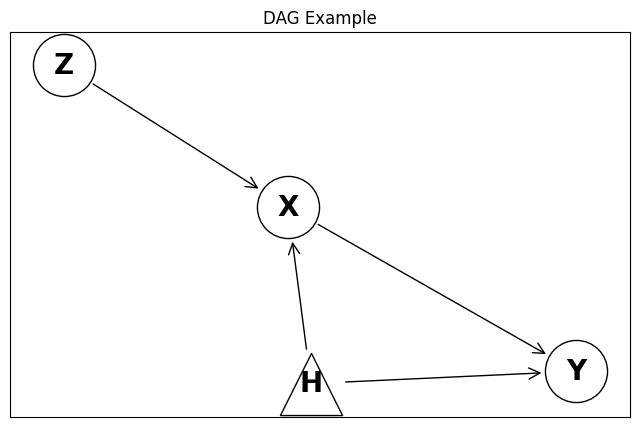

In [21]:
#plot_dag(dag0, ["D"])
#plot_dag(G, ["O1", "O5"])
plot_dag(instrumental_dag, ["H"])
#plot_dag(bell_dag, ["X"])
#plot_dag(ex_dag, [])

In [19]:
#nx.is_directed_acyclic_graph(instrumental_dag)

# is path (Z, X, Y) d-seperated by X
print("X:", nx.d_separated(instrumental_dag, {"Z", "X"}, {"X", "Y"}, {"X"}))

# is path (Z, X, H, Y) d-seperated by X or H
print("X:", nx.d_separated(instrumental_dag, {"Z", "X"}, {"X", "Y"}, {"X"}))
print("H:", nx.d_separated(instrumental_dag, {"Z", "X"}, {"X", "Y"}, {"H"}))

# if all paths are d-seperated, then all paths are open, and Z-Y (or the entire DAG?) is d-unseperable


X: False
X: False
H: False


In [20]:
# to find whether d_unseperable?
# find all weekly connected paths, then check if any of them is d_seperated by all elements in the path but source and target

for i in nx.all_simple_paths(instrumental_dag, source= "Z", target="Y"):
    print(i)
for i in nx.weakly_connected_components(instrumental_dag):
    print(i)


# lst= [node for node in instrumental_dag.nodes() if node not in ["X", "Y"]]
# for node in lst:
#     print(f"{node}:", nx.d_separated(instrumental_dag, {"Z", "X"}, {"X", "Y"}, {node}))

['Z', 'X', 'Y']
{'X', 'Y', 'H', 'Z'}
